Objetivo do trabalho, é avaliar alguns modelos de aprendizado de máquina, utilizando o dataset: 
<br>
https://www.kaggle.com/kemical/kickstarter-projects#ks-projects-201801.csv 


O dataset em questão possui dados de projetos do kickstarter. Os dados presentes no dataset são de: valores arecadados, o status atual do projeto, data de inicio do projeto entre outros.

A idéia central e utilizar os dados para prever se um determiando projeto pode ou não ter sucesso.

Os modelos de ML que serão avaliados são:

*   **RandomForestClassifier**
*   **LogisticRegression**
*   **DecisionTreeClassifier**

Os procedimentos utilizados para tratamento e manipulação dos dados serão descritos na etapa de normalização.





Importações de bilbioteas ou módulos:

**pandas**: Fazer a manipulação de arquivos csv, json, etc.
<br>
**sklearn**: Conhecida como scikit-learn possui modulos de aprendizado de máquina e alguns utilitários para o estátisticas de treinamento do modelo.
<br>
**numpy:** Utilizada para operações aritiméticas e manipulação de vetores e matrizes
<br>
**datetime**: Biblioteca para manipulação de data do Python.
<br>
**pickle**: Utilizado para serializar e desserializar uma estrutura de objeto Python.
<br>
**seaborn e matplotlib**: Bibliotecas gráficas para plot de gráficos estatísticos.




In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import datetime
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def replace_spaces_to_null_values(dataset, column):
    dataset[column] = dataset[column].replace(" ", 0)
    

def convert_column_to_float(dataset, column):
    dataset[column] = dataset[column].astype(float)


def remove_column(dataset, columns):
    return dataset.drop(columns=columns)

def verify_columns2(dataset):
    for col in dataset.columns:
        if dataset[col].dtype == 'object':
            try:
                replace_spaces_to_null_values(dataset, col)
                convert_column_to_float(dataset, col)
            except Exception:
                pass

def return_data(x, labels):
    try:
        labels.index(x)
    except Exception:
        pass
        labels.append(x)
    return labels.index(x)


def normalize_csv_to_ml(dataset):
    verify_columns2(dataset)
    new_dataset = dataset
    for c, t in dict(new_dataset.dtypes).items():
        labels = []
        if t.name == 'object':
            new_dataset[c] = new_dataset[c].apply(lambda x: return_data(x, labels))
    return new_dataset
  


Importação do dataset e remoção das colunas "ID", "name", "currency". As colunas não possuem informações relevantes para uso no processo de treinamento.
<br>
A função **remove_column**, remove um conjunto de colunas e retorna um novo dataset.
<br>
A função **fillna**, preenche os valores de NA / NaN com um determinado valor ou função especificado.

In [3]:
dataset = remove_column(pd.read_csv("ks-projects-201801.csv"), ['ID', 'name', 'currency']).fillna(0)

Como o intuito do trabalho é prever se um determinado projeto pode ter o status de sucesso, foi criada um nova coluna chamada de **new_state** baseada na coluna **state** onde foram extraídos os dados.
<br>
Para a nova coluna foram atribuidos valores inteiros onde as linhas que possuem o status **successful** na antiga coluna, passariam a ter o valor 1 (True). Já os demais status ficariam com o valor 0 (False).

Utilizado o método apply para aplicar um determinada função sobre os dados da coluna. A função utilizada auxiliar **return_status**, retorna o valor inteiro 0 ou 1 para a condição especificada.

In [4]:
def return_status(x):
  return 1 if x == 'successful' else 0

dataset['new_state'] = dataset['state'].apply(lambda x: return_status(x))

As colunas **launched** e **deadline** possuem informações das datas de inicio e fim dos projeto, estes dados estão em formato string. Como são informações importantes para a etapa de treinamento foi criado um nova coluna chamada de **lifetime** onde foi extraido o número de dias entre essas datas. 

In [5]:
dataset['launched'] = pd.to_datetime(dataset['launched'])

dataset['deadline'] = pd.to_datetime(dataset['deadline'])

dataset['lifetime'] = (dataset['deadline'] - dataset['launched'])

dataset['lifetime'] = dataset['lifetime'].apply(lambda x: x.days)

Remoção das colunas que foram utilizadas nas operações anteriores

In [6]:
dataset = remove_column(dataset, ['state', 'launched', 'deadline'])

O método **normalize_csv_to_ml** faz a normalização dos dados para o uso em algoritmos de aprendizado de máquina. Essa normalização consiste na substituição de dados categóricos (texto) em valore numéricos.
<br>
A função pega cada coluna do dataset e verifica o tipo dos dados presentes nas mesmas. Por padrão o pandas reconhece dados categóricos como **object**, então todas as colunas deste tipo devem ter seus dados convertidos para indices (números inteiros) que representem cada registro.
<br>
Ex:
<br>
Poetry = 1
<br>
Narrative Film = 2
<br>
Music = 3
<br>
...
<br>

In [7]:
new_dataset = normalize_csv_to_ml(dataset)

Nesta parte é feita a separação dos dados para o treinamento. São separados em dois conjuntos sendo o conjunto **y_values** onde a variavel alvo do trabalho é armazenada, no caso a coluna **new_state**.

Já o conjunto **x_values**, possue as demais colunas selecionadas para o treinamento.

In [8]:
x_values = remove_column(new_dataset, ['new_state']).values
y_values = new_dataset['new_state'].values

Divisão do conjunto em dados de treinamento e dados para teste 

In [9]:
x_train, x_train_test, y_train, y_train_test = train_test_split(x_values, y_values, test_size=0.20)

Divisão opicional onde os dados de testes são divididos para se obter um conjunto para teste do modelo após o processo de treinamento.

In [10]:
x_test, x_test_model, y_test, y_test_model = train_test_split(x_train_test, y_train_test, test_size=0.10)

Criação dos 3 modelos para testes. Foram utilizados os parametros default de cada modelo.
<br>
As funções **confusion_matrix**, **classification_report** e **accuracy_score** retornam estatisticas do modelo após o treinamento utilizandos os dados de teste.
<br>
O método **dump** da biblioteca pickle salva o modelo treinado em arquivo no formato .sav, possibilitando a utilização do mesmo em outras aplicações. 

In [11]:
def run_logistic_regression():
    print('------------------/Logistic_regression/--------------------------')
    test_model = LogisticRegression()
    test_model.fit(x_train, y_train)
    pred = test_model.predict(x_test)
    print('Matriz de confusão')
    print(confusion_matrix(y_test, pred))
    print('Reports')
    print(classification_report(y_test, pred))
    print('Accuracy')
    print(accuracy_score(y_test, pred))
    pickle.dump(test_model, open('logistic_regression.sav', 'wb'))
    print('------------------/End/--------------------------')


def run_random_forest():
    print('------------------/Random_Forest/--------------------------')
    test_model = RandomForestClassifier()
    test_model.fit(x_train, y_train)
    pred = test_model.predict(x_test)
    print('Matriz de confusão')
    print(confusion_matrix(y_test, pred))
    print('Reports')
    print(classification_report(y_test, pred))
    print('Accuracy')
    print(accuracy_score(y_test, pred))
    pickle.dump(test_model, open('random_forest.sav', 'wb'))
    print('------------------/End/--------------------------')


def run_decision_tree_classifier():
    print('------------------/Decision_Tree/--------------------------')
    test_model = DecisionTreeClassifier()
    test_model.fit(x_train, y_train)
    pred = test_model.predict(x_test)
    print('Matriz de confusão')
    print(confusion_matrix(y_test, pred))
    print('Reports')
    print(classification_report(y_test, pred))
    print('Accuracy')
    print(accuracy_score(y_test, pred))
    pickle.dump(test_model, open('decision_tree_classifier.sav', 'wb'))
    print('------------------/End/--------------------------')

A Matriz de confusão segue a estrutura presente na seguinte imagem:
<br>
<img src="http://2.bp.blogspot.com/_qIDcOEX659I/SlkCLyH_zuI/AAAAAAAAAlw/l8ypxkWq0vU/contingencia_thumb%5B1%5D.png"/>
<br>
**VP**: ocorre quando no conjunto, a classe que estamos buscando foi prevista corretamente. Por exemplo, quando o projeto conseguiu obeter sucesso e o modelo treinado previu corretamente que o mesmo projeto terá sucesso.
<br>
**VN**:  ocorre quando no conjunto, a classe que não estamos buscando prever foi prevista corretamente. Exemplo: o projeto não obteve sucesso, e o modelo previu corretamente que ele não obteve.
<br>
**FP**: ocorre quando no conjunto, a classe que estamos buscando prever foi prevista incorretamente. Exemplo: o projeto não obteve sucesso, mas o modelo disse que ele obteve.
<br>
**FN**: ocorre quando no conjunto, a classe que não estamos buscando prever foi prevista incorretamente. Por exemplo, quando a o projeto teve sucesso mas o modelo previu incorretamente que ela não teve sucesso.
<br>
<br>

**precision**: Precisão do modelo para cada classe de treinamento.
<br>
**recall**: O recall é a razão entre o número de verdadeiros positivos e o número de falsos negativos. O recall é intuitivamente a capacidade do classificador de encontrar todas as amostras positivas. **(vp / (vp + fn))**
<br>
**f1-score**: A f1-score pode ser interpretada como uma média ponderada da precisão e o recall.
<br>
**support**: É o número de ocorrências de cada classe.

In [12]:
run_logistic_regression()
run_random_forest()
run_decision_tree_classifier()

------------------/Logistic_regression/--------------------------


C:\Users\Giovani\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Matriz de confusão
[[43461   665]
 [  432 23601]]
Reports
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     44126
           1       0.97      0.98      0.98     24033

    accuracy                           0.98     68159
   macro avg       0.98      0.98      0.98     68159
weighted avg       0.98      0.98      0.98     68159

Accuracy
0.9839052803004739
------------------/End/--------------------------
------------------/Random_Forest/--------------------------
Matriz de confusão
[[43797   329]
 [   34 23999]]
Reports
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     44126
           1       0.99      1.00      0.99     24033

    accuracy                           0.99     68159
   macro avg       0.99      1.00      0.99     68159
weighted avg       0.99      0.99      0.99     68159

Accuracy
0.9946742176381695
------------------/End/--------------------------
--------------

O método **load** é utilizado para importar o arquivo com o modelo treinado. Foi importado o modelo treinado com o algoritmo random_forest, pois o mesmo demostrou um melhor resultado no treinamento. 

In [13]:
model_loaded = pickle.load(open('random_forest.sav','rb'))

Foi implementado um método para uma contagem manual, onde os resultados ficaram muito próximos dos resultados apresentados nas métricas durante o treinamento.

Acertou: 7538
Porcentagem de acertos: 99.5247%
Errou: 36
Porcentagem de erros: 0.4753%


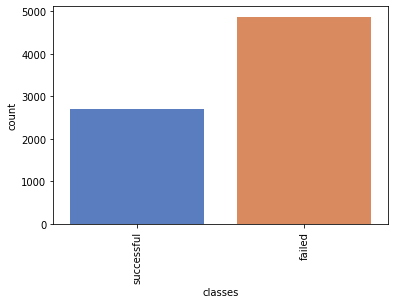

In [18]:
countTrue = 0
countFalse = 0
test_classes = []

for i in range(len(x_test_model)):
    test = model_loaded.predict(x_test_model[i].reshape(1, -1))
    test_classes.append(test)
    if test == y_test_model[i]:
        countTrue += 1
    else:
        countFalse += 1
    
print('Acertou: {0:.0f}'.format(countTrue))
print('Porcentagem de acertos: {0:.4f}%'.format((countTrue / len(x_test_model)) * 100))
print('Errou: {0:.0f}'.format(countFalse))
print('Porcentagem de erros: {0:.4f}%'.format((countFalse / len(x_test_model)) * 100))

result_test_classes = list(map(lambda x: 'successful' if x == 1 else 'failed', test_classes))

result_data_classes = pd.DataFrame(result_test_classes, columns=['classes'])

p = sns.countplot(x="classes", data = result_data_classes, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90) 